In [196]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [198]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [199]:
x_train[0].shape

(28, 28)

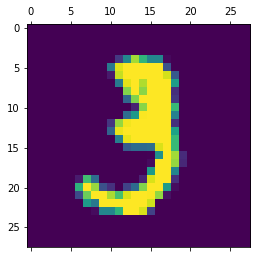

In [200]:
plt.matshow(x_train[10])

In [201]:
x_train_reshaped = x_train.reshape(len(x_train), 28*28)
x_test_reshaped = x_test.reshape(len(x_test), 28*28)

In [202]:
x_train_reshaped.shape

(60000, 784)

In [203]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [205]:
x_train_std = x_train/255

In [206]:
x_test_std = x_test/255

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3466 - accuracy: 0.8861
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.1390 - accuracy: 0.8907
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.1393 - accuracy: 0.8892
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2378 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.1330 - accuracy: 0.8911


In [211]:
x_train_std.shape

(60000, 28, 28)

In [212]:
x_train_std_reshaped = x_train_std.reshape(len(x_train_std), 28*28)


In [213]:
x_test_std_reshaped = x_test_std.reshape(len(x_test_std), 28*28)

In [215]:
model.fit(x_train_std_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3076 - accuracy: 0.9150
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.9233
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2634 - accuracy: 0.9258
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2587 - accuracy: 0.9278
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9282
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2519 - accuracy: 0.9295
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2499 - accuracy: 0.9300
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.246

In [216]:
model.evaluate(x_test_std_reshaped, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.9284


[0.2632697820663452, 0.9283999800682068]

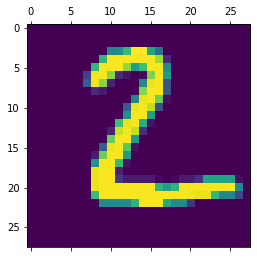

In [217]:
plt.matshow(x_test[1])

In [218]:
y_predicted = model.predict(x_test_std_reshaped)

In [219]:
y_predicted[1]

array([4.8080656e-01, 2.6622087e-02, 9.9990928e-01, 1.1549333e-01,
       4.1211257e-11, 9.7175395e-01, 9.8851669e-01, 3.5286006e-17,
       3.6440277e-01, 3.9767907e-13], dtype=float32)

In [220]:
np.argmax(y_predicted[1])

2

In [221]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [222]:
y_pred_labels = []
for i in y_predicted:
    y_pred_labels.append(np.argmax(i))

In [223]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    0,    8,   11,    2,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    8,  925,   16,    9,    4,   14,    9,   41,    3],
       [   3,    0,   16,  925,    1,   21,    3,   10,   24,    7],
       [   1,    1,    5,    2,  924,    0,    8,    4,   11,   26],
       [   7,    2,    2,   36,   10,  779,   15,    6,   30,    5],
       [   8,    3,    7,    1,    7,   13,  916,    1,    2,    0],
       [   1,    7,   23,    8,    8,    1,    0,  939,    2,   39],
       [   4,    7,    6,   21,    9,   20,    7,    7,  882,   11],
       [   7,    8,    1,   10,   24,    6,    0,   13,    8,  932]])>

In [224]:
import seaborn as sns

Text(0.5, 42.0, 'Predicted')

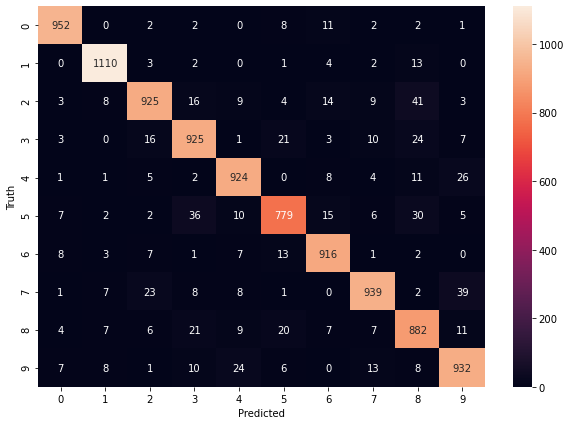

In [225]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.ylabel('Truth')
plt.xlabel('Predicted')

In [226]:
from sklearn.metrics import f1_score, accuracy_score

In [227]:
accuracy_score(y_test,y_pred_labels)

0.9284

In [228]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model2.compile( 
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

In [229]:
model2.fit(x_train_std_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1242 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [230]:
model2.evaluate(x_test_std_reshaped, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9754


[0.08979134261608124, 0.9753999710083008]

In [231]:
y_pred2 = model2.predict(x_test_std_reshaped)

In [232]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [233]:
(y_pred2)

array([[1.6340375e-05, 5.7743478e-08, 2.4712533e-02, ..., 9.9998838e-01,
        1.0462701e-03, 1.7418194e-01],
       [5.0863326e-02, 8.5002327e-01, 9.9999976e-01, ..., 5.1264843e-12,
        9.1463327e-04, 7.6382395e-07],
       [5.5491586e-05, 9.9953288e-01, 9.0437502e-02, ..., 3.4737289e-02,
        5.9663534e-02, 1.5279651e-04],
       ...,
       [6.7985712e-10, 9.5300280e-08, 3.0316043e-09, ..., 2.4661422e-04,
        2.0467043e-03, 9.1218805e-01],
       [2.0657182e-03, 4.8929948e-08, 2.5231155e-09, ..., 1.7728488e-06,
        8.4148592e-01, 1.7321914e-05],
       [1.3026595e-04, 1.0895952e-05, 4.0850639e-03, ..., 3.0991607e-09,
        3.5127155e-06, 3.9990876e-08]], dtype=float32)

In [234]:
y_pred_labels2 = []
for i in y_pred2:
    y_pred_labels2.append(np.argmax(i))

In [235]:
y_pred_labels2

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 4,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [236]:
cm2 = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels2)

In [237]:
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    2,    0,    2,    1,    4,    1,    1,    2],
       [   0, 1123,    3,    3,    0,    1,    3,    0,    2,    0],
       [   3,    2, 1007,    5,    4,    0,    3,    2,    5,    1],
       [   0,    0,    3,  996,    1,    1,    1,    2,    0,    6],
       [   0,    0,    2,    0,  973,    0,    2,    0,    0,    5],
       [   1,    0,    0,   20,    4,  854,    6,    0,    4,    3],
       [   3,    2,    0,    0,    6,    3,  943,    0,    1,    0],
       [   2,    4,   12,    5,    3,    0,    0,  986,    2,   14],
       [   3,    1,    7,   20,    7,    3,    6,    2,  914,   11],
       [   2,    2,    0,    3,    8,    1,    0,    1,    0,  992]])>

In [238]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [240]:
model3.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4185 - accuracy: 0.8985
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3018 - accuracy: 0.9236
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2533 - accuracy: 0.9345
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2295 - accuracy: 0.9416
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2113 - accuracy: 0.9451
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2037 - accuracy: 0.9486
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1980 - accuracy: 0.9506
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1894 - accuracy: 0.9528
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1814 - accuracy: 0.9540
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.182